<a href="https://colab.research.google.com/github/gtrived/Customer_Satisfaction_Prediction/blob/master/Customer_prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

import os
os.chdir("/content/drive/My Drive/resolvr")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wEds6Wld64tI5AJo2jdZ-v36B77qBugNBIbtpGU4TwUfWpamgLjosY
Mounted at /content/drive


In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.datasets import *
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
# Importing data
import pandas as pd

from pandas import read_excel

my_sheet = 'Case Study 2020' 
file_name = 'Worksheet in Analytics_Case_Resolvr2020.xlsx' 
data = read_excel(file_name, sheet_name = my_sheet)
#print(df.head())


#data = pd.read_excel('train.xlsx')
data.columns = [c.replace(' ', '_') for c in data.columns]
data.head()

,Customer_ID,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1


In [9]:
data.describe()

,Customer_ID,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129876.000000,129876.000000,129877.000000,129872.000000,129875.000000,129874.000000,129879.000000,129876.000000,129877.000000,129878.000000,129878.000000,129877.000000,129879.000000,129878.000000,129880.000000,129487.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,2.728703,3.057609,2.756885,2.976931,3.204805,3.252599,3.441349,3.358080,3.383016,3.350891,3.632132,3.306251,3.642213,3.286315,14.713713,15.091129,0.434463
std,37493.270818,15.119360,997.452477,1.329334,1.526757,1.401742,1.278526,1.329917,1.350718,1.319287,1.334033,1.287106,1.316245,1.180024,1.266189,1.176651,1.313689,38.071126,38.465650,0.495688
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [10]:
data = data.drop('Customer_ID', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer_Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight_Distance                    129880 non-null  int64  
 6   Inflight_wifi_service              129876 non-null  float64
 7   Departure/Arrival_time_convenient  129876 non-null  float64
 8   Ease_of_Online_booking             129877 non-null  float64
 9   Gate_location                      129872 non-null  float64
 10  Food_and_drink                     129875 non-null  float64
 11  Online_boarding                    1298

In [11]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Arrival_Delay_in_Minutes,393,0.003026
Gate_location,8,0.000062
Online_boarding,6,0.000046
Food_and_drink,5,0.000038
Inflight_wifi_service,4,0.000031
Departure/Arrival_time_convenient,4,0.000031
Inflight_entertainment,4,0.000031
On-board_service,3,0.000023
Checkin_service,3,0.000023
Ease_of_Online_booking,3,0.000023


In [12]:
# mean imputing to Gate_location, Online_boarding, Food_and_drink, Inflight_wifi_service, Departure/Arrival_time_convenient, Inflight_entertainment, On-board_service
#Checkin_service, Ease_of_Online_booking, Leg_room_service, Baggage_handling, Cleanliness, Seat_comfort, Inflight_service
data['Gate_location'] = data['Gate_location'].fillna(round(data['Gate_location'].mean()))
data['Inflight_wifi_service'] = data['Inflight_wifi_service'].fillna(round(data['Inflight_wifi_service'].mean()))
data['Departure/Arrival_time_convenient'] = data['Departure/Arrival_time_convenient'].fillna(round(data['Departure/Arrival_time_convenient'].mean()))
data['Online_boarding'] = data['Online_boarding'].fillna(round(data['Online_boarding'].mean()))
data['On-board_service'] = data['On-board_service'].fillna(round(data['On-board_service'].mean()))
data['Leg_room_service'] = data['Leg_room_service'].fillna(round(data['Leg_room_service'].mean()))
data['Checkin_service'] = data['Checkin_service'].fillna(round(data['Checkin_service'].mean()))
data['Food_and_drink'] = data['Food_and_drink'].fillna(round(data['Food_and_drink'].mean()))
data['Ease_of_Online_booking'] = data['Ease_of_Online_booking'].fillna(round(data['Ease_of_Online_booking'].mean()))

data['Inflight_entertainment']=data['Inflight_entertainment'].fillna(round(data['Inflight_entertainment'].mean()))
data['Cleanliness']=data['Cleanliness'].fillna(round(data['Cleanliness'].mean()))
data['Baggage_handling']=data['Baggage_handling'].fillna(round(data['Baggage_handling'].mean()))
data['Seat_comfort']=data['Seat_comfort'].fillna(round(data['Seat_comfort'].mean()))
data['Inflight_service']=data['Inflight_service'].fillna(round(data['Inflight_service'].mean()))
data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1


In [13]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
Arrival_Delay_in_Minutes,393,0.003026
satisfaction,0,0.000000
Food_and_drink,0,0.000000
Customer_Type,0,0.000000
Age,0,0.000000
Type_of_Travel,0,0.000000
Class,0,0.000000
Flight_Distance,0,0.000000
Inflight_wifi_service,0,0.000000
Departure/Arrival_time_convenient,0,0.000000


In [14]:
#median imputing
data['Arrival_Delay_in_Minutes'] = data['Arrival_Delay_in_Minutes'].fillna(round(data['Arrival_Delay_in_Minutes'].median()))

In [15]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
satisfaction,0,0.0
Food_and_drink,0,0.0
Customer_Type,0,0.0
Age,0,0.0
Type_of_Travel,0,0.0
Class,0,0.0
Flight_Distance,0,0.0
Inflight_wifi_service,0,0.0
Departure/Arrival_time_convenient,0,0.0
Ease_of_Online_booking,0,0.0


In [16]:
data.describe()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.00000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728711,3.057607,2.756891,2.976933,3.204797,3.252587,3.441346,3.358069,3.383007,3.350885,3.632137,3.306244,3.642216,3.28631,14.713713,15.045465,0.434463
std,15.119360,997.452477,1.329314,1.526734,1.401726,1.278487,1.329892,1.350688,1.319282,1.334014,1.287092,1.316235,1.180015,1.266176,1.176647,1.31368,38.071126,38.416353,0.495688
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.00000,0.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.00000,0.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.00000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,1592.000000,1584.000000,1.000000


In [17]:
#mode imputing
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Customer_Type'] = data['Customer_Type'].fillna(data['Customer_Type'].mode()[0])
data['Type_of_Travel'] = data['Type_of_Travel'].fillna(data['Type_of_Travel'].mode()[0])
data['Class'] = data['Class'].fillna(data['Class'].mode()[0])

In [18]:
#partition of ratin
# 1 - negative
# 2 - neutral
# 3 - positive
def partition(x):
  if x>3:
    return 3
  elif x==3:
    return 2
  return 1

In [19]:
actualScore = data['Inflight_wifi_service']
positiveNegative = actualScore.map(partition) 
data['Inflight_wifi_service'] = positiveNegative

actualScore = data['Departure/Arrival_time_convenient']
positiveNegative = actualScore.map(partition) 
data['Departure/Arrival_time_convenient'] = positiveNegative

actualScore = data['Ease_of_Online_booking']
positiveNegative = actualScore.map(partition) 
data['Ease_of_Online_booking'] = positiveNegative

actualScore = data['Gate_location']
positiveNegative = actualScore.map(partition) 
data['Gate_location'] = positiveNegative

actualScore = data['Food_and_drink']
positiveNegative = actualScore.map(partition) 
data['Food_and_drink'] = positiveNegative

actualScore = data['Online_boarding']
positiveNegative = actualScore.map(partition) 
data['Online_boarding'] = positiveNegative

actualScore = data['Seat_comfort']
positiveNegative = actualScore.map(partition) 
data['Seat_comfort'] = positiveNegative

actualScore = data['Inflight_entertainment']
positiveNegative = actualScore.map(partition) 
data['Inflight_entertainment'] = positiveNegative

actualScore = data['On-board_service']
positiveNegative = actualScore.map(partition) 
data['On-board_service'] = positiveNegative

actualScore = data['Leg_room_service']
positiveNegative = actualScore.map(partition) 
data['Leg_room_service'] = positiveNegative

actualScore = data['Baggage_handling']
positiveNegative = actualScore.map(partition) 
data['Baggage_handling'] = positiveNegative

actualScore = data['Checkin_service']
positiveNegative = actualScore.map(partition) 
data['Checkin_service'] = positiveNegative

actualScore = data['Inflight_service']
positiveNegative = actualScore.map(partition) 
data['Inflight_service'] = positiveNegative

actualScore = data['Cleanliness']
positiveNegative = actualScore.map(partition) 
data['Cleanliness'] = positiveNegative


In [20]:
data.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,2,3,2,1,3,2,3,3,3,2,3,3,3,3,25,18.0,0
1,Male,disloyal Customer,25,Business travel,Business,235,2,1,2,2,1,2,1,1,1,3,2,1,3,1,1,6.0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,1,1,1,1,3,3,3,3,3,2,3,3,3,3,0,0.0,1
3,Female,Loyal Customer,25,Business travel,Business,562,1,3,3,3,1,1,1,1,1,3,2,1,3,1,11,9.0,0
4,Male,Loyal Customer,61,Business travel,Business,214,2,2,2,2,3,3,3,2,2,3,3,2,2,2,0,0.0,1


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


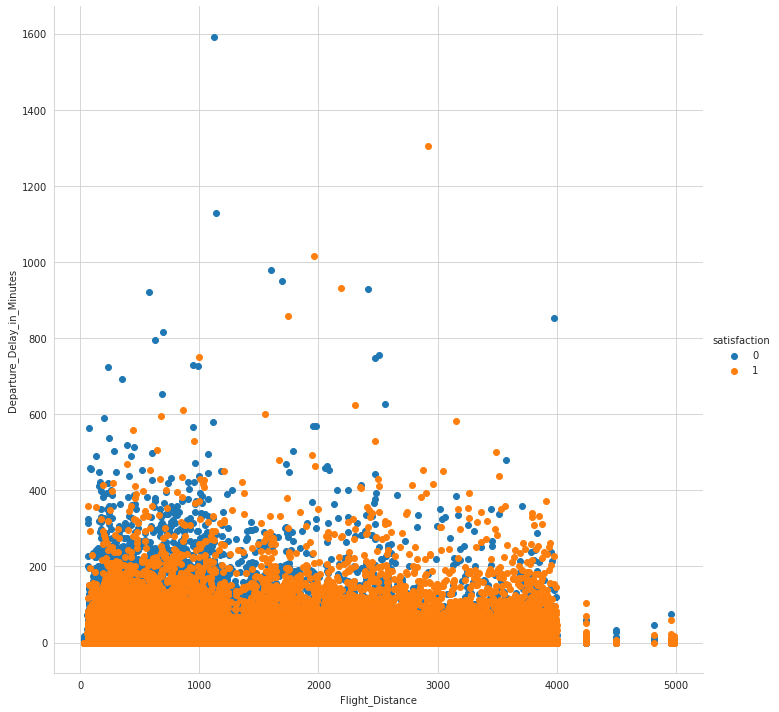

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="satisfaction", size=10) \
   .map(plt.scatter, "Flight_Distance", "Departure_Delay_in_Minutes") \
   .add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


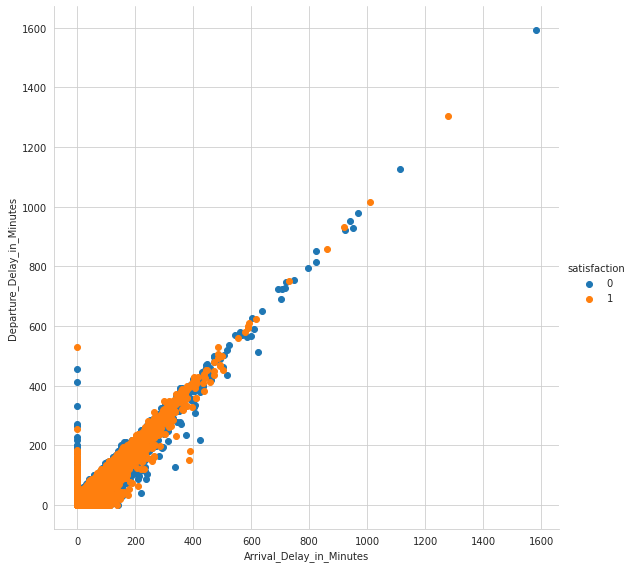

In [22]:
sns.set_style("whitegrid");
sns.FacetGrid(data, hue="satisfaction", size=8) \
   .map(plt.scatter, "Arrival_Delay_in_Minutes", "Departure_Delay_in_Minutes") \
   .add_legend();
plt.show();

In [23]:
for i in range(0,100,10):
    var =data["Departure_Delay_in_Minutes"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 0
10 percentile value is 0
20 percentile value is 0
30 percentile value is 0
40 percentile value is 0
50 percentile value is 0
60 percentile value is 2
70 percentile value is 8
80 percentile value is 19
90 percentile value is 44
100 percentile value is  1592


In [24]:
for i in np.arange(0.0, 1.0, 0.1):
    var =data["Arrival_Delay_in_Minutes"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 182.0
99.1 percentile value is 187.0
99.2 percentile value is 196.0
99.3 percentile value is 207.0
99.4 percentile value is 219.0
99.5 percentile value is 236.0
99.6 percentile value is 255.0
99.7 percentile value is 280.0
99.8 percentile value is 317.0
99.9 percentile value is 383.0
100 percentile value is  1584.0


In [25]:
#remove outliers
# drop arrival_delay_time field
# delay cuttoff will be 400 mi as 99.9 percent data is less than 383 mi


In [26]:
for i in range(0,100,10):
    var =data["Flight_Distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is 31
10 percentile value is 236
20 percentile value is 358
30 percentile value is 483
40 percentile value is 631
50 percentile value is 844
60 percentile value is 1050
70 percentile value is 1513
80 percentile value is 2072
90 percentile value is 2751
100 percentile value is  4983


In [27]:
for i in np.arange(0.0, 1.0, 0.1):
    var =data["Flight_Distance"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 3884
99.1 percentile value is 3895
99.2 percentile value is 3906
99.3 percentile value is 3920
99.4 percentile value is 3932
99.5 percentile value is 3945
99.6 percentile value is 3956
99.7 percentile value is 3970
99.8 percentile value is 3983
99.9 percentile value is 3996
100 percentile value is  4983


In [28]:
#remove outliers
# drop arrival_delay_time field
# delay cuttoff will be 400 min as 99.9 percent data is less than 383 mi
# flight distance cutt off 4000 km
def pre_processing(new_frame):
    new_frame = new_frame[(new_frame.Age > 17)]
    #new_frame = new_frame[(new_frame.Inflight_wifi_service > 0)]
    new_frame = new_frame[(new_frame.Departure_Delay_in_Minutes < 401)]
    new_frame = new_frame[(new_frame.Flight_Distance < 4001)]
    new_frame = new_frame.drop('Arrival_Delay_in_Minutes', axis=1)
    
    return new_frame


In [29]:
data_processed = pre_processing(data)

data_processed.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,satisfaction
1,Male,disloyal Customer,25,Business travel,Business,235,2,1,2,2,1,2,1,1,1,3,2,1,3,1,1,0
2,Female,Loyal Customer,26,Business travel,Business,1142,1,1,1,1,3,3,3,3,3,2,3,3,3,3,0,1
3,Female,Loyal Customer,25,Business travel,Business,562,1,3,3,3,1,1,1,1,1,3,2,1,3,1,11,0
4,Male,Loyal Customer,61,Business travel,Business,214,2,2,2,2,3,3,3,2,2,3,3,2,2,2,0,1
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,2,3,1,1,1,1,1,1,2,3,3,3,3,1,0,0


EDA

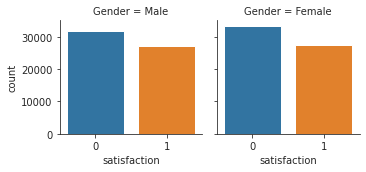

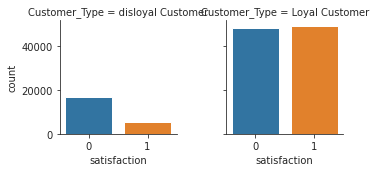

In [51]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=data_processed, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=data_processed, kind="count", height=2.5, aspect=1.0)

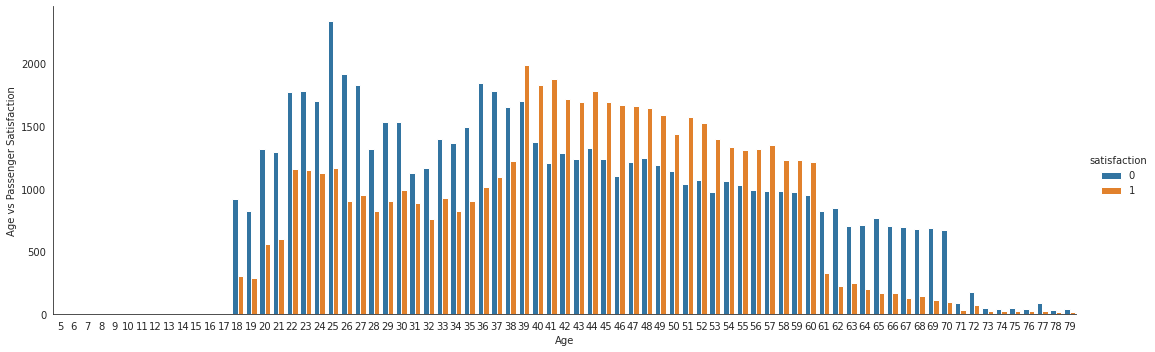

In [52]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=data_processed, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

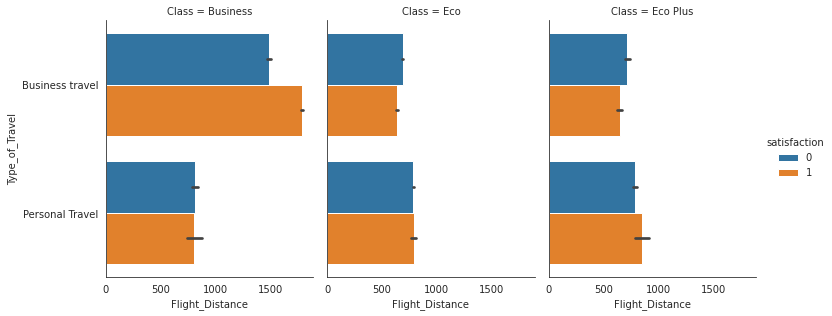

In [53]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=data_processed, kind="bar", height=4.5, aspect=.8)

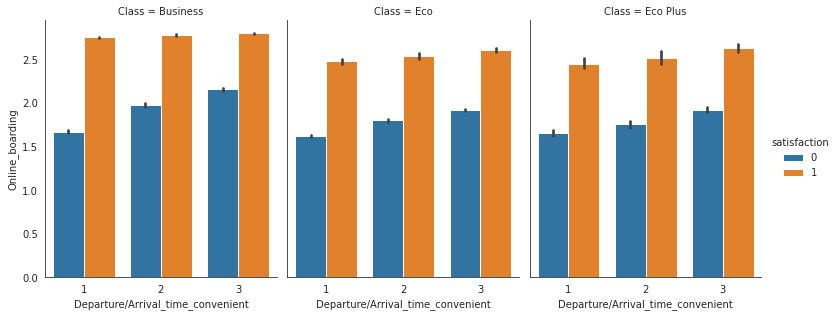

In [54]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=data_processed, kind="bar", height=4.5, aspect=.8)

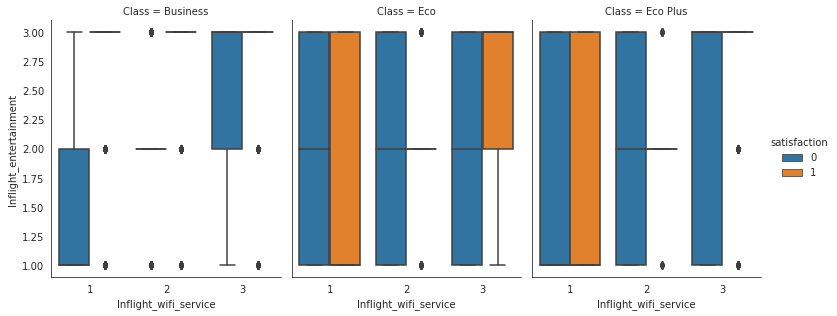

In [60]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=data_processed, kind="box", height=4.5, aspect=.8)

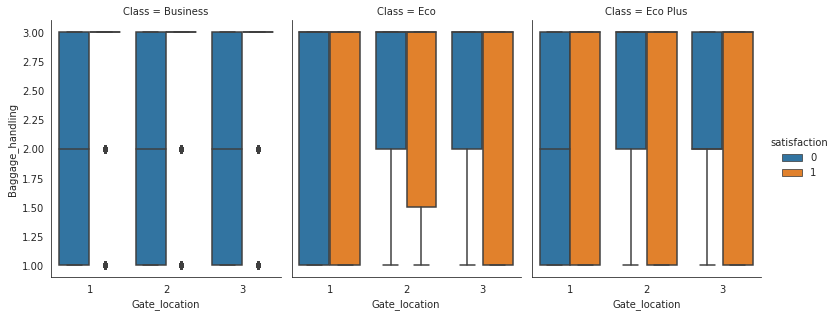

In [61]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=data_processed, kind="box", height=4.5, aspect=.8)

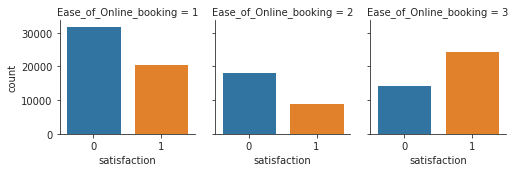

In [62]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=data_processed, kind="count", height=2.5, aspect=.9)

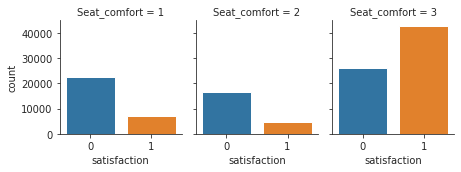

In [63]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=data_processed, kind="count", height=2.5, aspect=.8)

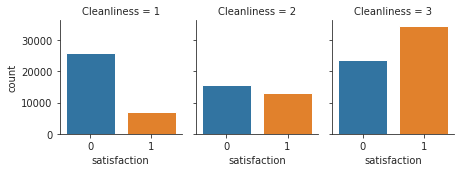

In [64]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=data_processed, kind="count", height=2.5, aspect=.8)

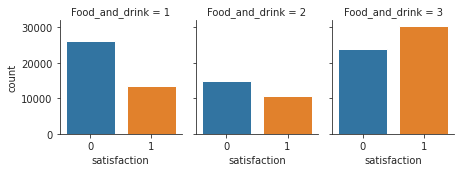

In [65]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=data_processed, kind="count", height=2.5, aspect=.8)

**Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink:**

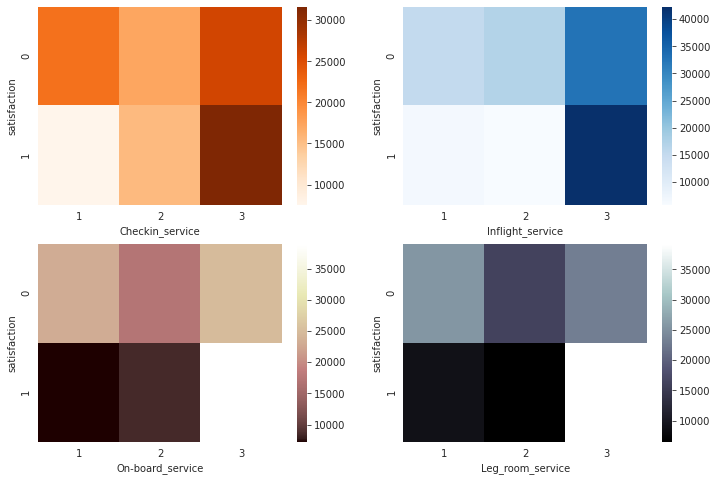

In [66]:
import matplotlib.pyplot as plt 
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(data_processed['satisfaction'], data_processed['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(data_processed['satisfaction'], data_processed['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(data_processed['satisfaction'], data_processed['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(data_processed['satisfaction'], data_processed['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

**Label Encoding of Categorical Variables**

In [67]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in data_processed.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    data_processed[col] = lencoders[col].fit_transform(data_processed[col])

Scaling

In [69]:

features=['Customer_Type',	'Age',	'Type_of_Travel',	'Class'	,'Flight_Distance',	'Inflight_wifi_service',	'Departure/Arrival_time_convenient',	'Ease_of_Online_booking',	'Gate_location',	'Food_and_drink',	'Online_boarding',	'Seat_comfort'	,'Inflight_entertainment'	,'On-board_service',	'Leg_room_service',	'Baggage_handling',	'Checkin_service',	'Inflight_service',	'Cleanliness',	'Departure_Delay_in_Minutes',	'satisfaction']
X=data_processed[features]

      
y=data_processed.satisfaction      

In [70]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)
target = ['satisfaction']
train = train_X
test = test_X

In [71]:
# Split into test and train

target = ['satisfaction']

X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)